In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

In [3]:
pkf = open('/Users/Raafe/Desktop/DataDriven/Homework/Homework3/loadCurves.pkl','rb')
data,loadCurves = pickle.load(pkf)
pkf.close()

In [4]:
f = open('/Users/Raafe/Desktop/DataDriven/Homework/Homework3/temperature.csv')
temp = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])

In [5]:
temp_ti=temp.set_index('Timestamp')
temp_ti2=temp.set_index('Timestamp',append=False,drop=False)

In [6]:
data_ti=data.set_index('Time',drop=False)
data_ti2=data_ti.resample('5Min').mean()

In [7]:
temp_ti2.columns=['Time','Temperature']

In [8]:
data_ti3=data_ti2.reset_index()

In [9]:
temp_ti3=temp_ti2.reset_index()

In [10]:
temp_ti4=temp_ti3.drop(temp_ti3.columns[0],axis=1)

In [11]:
alldata=pd.merge(temp_ti2,data_ti2,right_index=True,left_index=True)

In [12]:
alldata2=alldata.reset_index(drop=True)

In [13]:
alldata2.isnull().any()

Time           False
Temperature    False
Value           True
Hour            True
Weekday         True
DayOfYear       True
dtype: bool

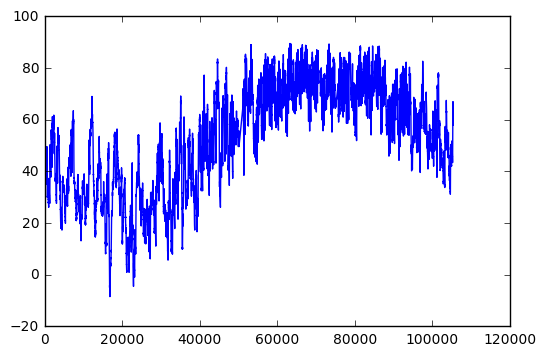

In [23]:
plt.plot(alldata2['Temperature'])